# Классификация текстов


### Загрузите датасет 20 newsgroups;

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [2]:
news = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)


### Разделите эти данные на тестовую и обучающую выборки;

In [3]:
news_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
news_train.target.shape

(11314,)

In [4]:
news_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [5]:
news_test.target.shape

(7532,)

### Выведите информацию о количественных параметрах датасета;

 _список названий запрошенных категорий_

In [6]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality               1
    Features                  text
    =================   ==========

### Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);


In [8]:
print('целевая переменная(тема новости):',news.target_names[1],'\n  \nНовость:\n',news.data[1])

целевая переменная(тема новости): comp.graphics 
  
Новость:
 From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon,

In [9]:
print(news.target_names[1])

comp.graphics


выводим класс новости и название класса среди первых 34 новостей с шагом 2

In [10]:
for i in range(1,34,2):
    print(news.target[i],'   ',news.target_names[news.target[i]])

3     comp.sys.ibm.pc.hardware
3     comp.sys.ibm.pc.hardware
12     sci.electronics
10     rec.sport.hockey
19     talk.religion.misc
11     sci.crypt
13     sci.med
17     talk.politics.mideast
12     sci.electronics
8     rec.motorcycles
5     comp.windows.x
8     rec.motorcycles
14     sci.space
1     comp.graphics
0     alt.atheism
16     talk.politics.guns
9     rec.sport.baseball


### Постройте модель наивного байесовского для классификации текстов;


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('nb', MultinomialNB()),])

In [12]:
%timeit text_clf.fit(news_train.data, news_train.target)
text_clf = text_clf.fit(news_train.data, news_train.target)

2.69 s ± 87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
predicted = text_clf.predict(news_test.data)

### Оцените качество модели на тестовой выборке


_достоверность предсказания_

In [14]:
np.mean(predicted == news_test.target)

0.7738980350504514

In [15]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74      0.82       396
         

не самая идеальная оценка достоверности предсказания, но далеко не самая худшая точность для некоторых категорий. Хотя назначение модели определять разные темы новостей, поэтому нужна точность высокая для всех тематик

_**матрица ошибок**_

In [16]:
matr = metrics.confusion_matrix(news_test.target, predicted)
for i in range(20):
    print(' |'.join(map(lambda y: '{:<3}'.format(y),map(lambda x: str(x),matr[i]))))



166 |0   |0   |1   |0   |1   |0   |0   |1   |1   |1   |3   |0   |6   |3   |123 |4   |8   |0   |1  
1   |252 |15  |12  |9   |18  |1   |2   |1   |5   |2   |41  |4   |0   |6   |15  |4   |1   |0   |0  
0   |14  |258 |45  |3   |9   |0   |2   |1   |3   |2   |25  |1   |0   |6   |23  |2   |0   |0   |0  
0   |5   |11  |305 |17  |1   |3   |6   |1   |0   |2   |19  |13  |0   |5   |3   |1   |0   |0   |0  
0   |3   |8   |23  |298 |0   |3   |8   |1   |3   |1   |16  |8   |0   |2   |8   |3   |0   |0   |0  
1   |21  |17  |13  |2   |298 |1   |0   |1   |1   |0   |23  |0   |1   |4   |10  |2   |0   |0   |0  
0   |1   |3   |31  |12  |1   |271 |19  |4   |4   |6   |5   |12  |6   |3   |9   |3   |0   |0   |0  
0   |1   |0   |3   |0   |0   |4   |364 |3   |2   |2   |4   |1   |1   |3   |3   |4   |0   |1   |0  
0   |0   |0   |1   |0   |0   |2   |10  |371 |0   |0   |4   |0   |0   |0   |8   |2   |0   |0   |0  
0   |0   |0   |0   |1   |0   |0   |4   |0   |357 |22  |0   |0   |0   |2   |9   |1   |1   |0   |0  
0   |0   |

В целом модель отличает темы новостей друг от друга, например, религиозную от компьютерной. Но если смотреть в разрезе конкретной темы, то например, модель путает тему атеизма и христианства, и это видно по матрийце ошибок:123 текста о христианстве модель определила как новость об атеизме

### Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")



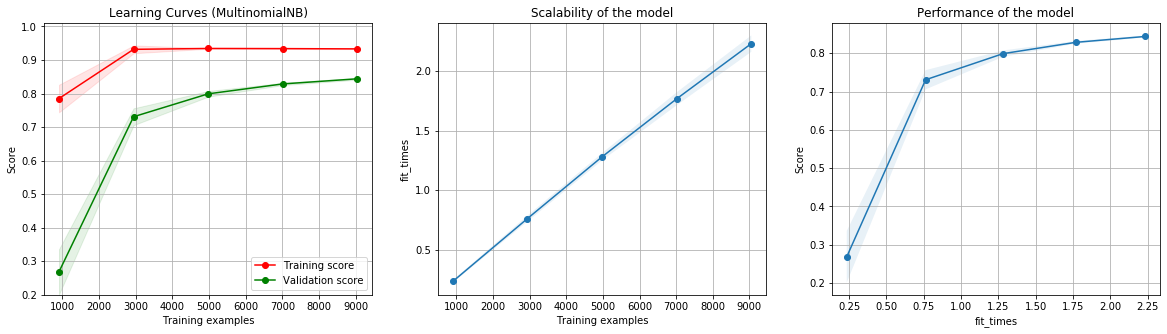

In [18]:
title = r"Learning Curves (MultinomialNB)"
estimator = text_clf
plot_learning_curve(estimator, title, news_train.data, news_train.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

Так как валидационная кривая при увеличении объема данных стабилизируется( причем на достаточном хорошем показателе точности), а кривая обучения  с увеличением объема выборки растет, но не выходит на плато так же быстро, как и валидационная. то можно предположить, что модель не дообучена  

### Сделайте вывод о применимости модели

Данную модель я бы не стала применять, так как у нее хоть и не совсем низкая, но и недостаточно высокая точность предсказания. К тому же данная модель путает смежные темы, ведь недаром она называется наивной (ведь алгоритм строится на предположении того, что фичи не зависимы друг от друга )

## Дополнительные задания


#### Постройте модели классификации для данной задачи на основе следующих методов:
_логистическая регрессия (LogisticRegression);_


In [19]:
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', LogisticRegression(solver='liblinear')),])

%timeit text_clf.fit(news_train.data, news_train.target)
text_clf = text_clf.fit(news_train.data, news_train.target)
predicted = text_clf.predict(news_test.data)

8.53 s ± 530 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
np.mean(predicted == news_test.target)

0.8279341476367499

In [21]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.74      0.77       319
           comp.graphics       0.69      0.78      0.74       389
 comp.os.ms-windows.misc       0.76      0.75      0.75       394
comp.sys.ibm.pc.hardware       0.73      0.72      0.72       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.76      0.90      0.83       390
               rec.autos       0.91      0.89      0.90       396
         rec.motorcycles       0.94      0.95      0.94       398
      rec.sport.baseball       0.87      0.93      0.90       397
        rec.sport.hockey       0.94      0.96      0.95       399
               sci.crypt       0.93      0.89      0.91       396
         sci.electronics       0.76      0.78      0.77       393
                 sci.med       0.89      0.84      0.86       396
         

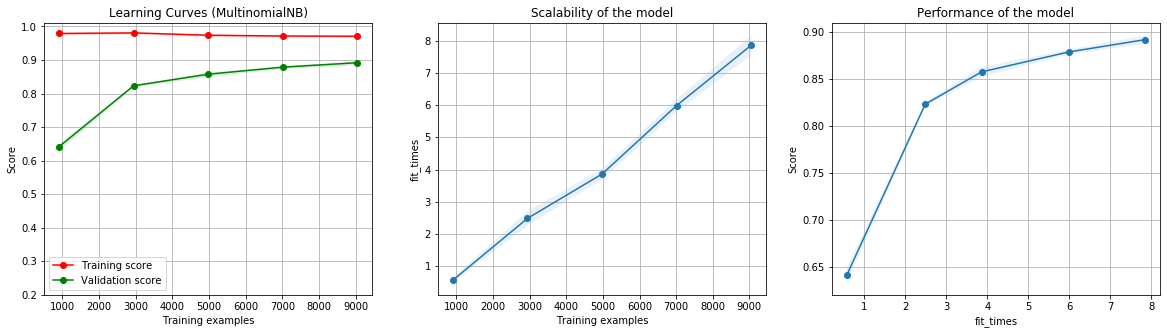

In [22]:
title = r"Learning Curves "
estimator = text_clf
plot_learning_curve(estimator, title, news_train.data, news_train.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

C учеличением объема выборки прямые начинают сходиться: валидационная прямая улучшает свой показатель, а тренировочная ухудшает,то  добавление новых данных не поможет – надо менять сложность модели

_метод опорных векторов с гауссовым ядром (SVC);_



In [24]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,  random_state=42)),])

%timeit text_clf.fit(news_train.data, news_train.target)
text_clf = text_clf.fit(news_train.data, news_train.target)
predicted = text_clf.predict(news_test.data)

3.36 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
np.mean(predicted == news_test.target)

0.8240839086563994

In [26]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.71      0.72       319
           comp.graphics       0.81      0.69      0.75       389
 comp.os.ms-windows.misc       0.71      0.78      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.67      0.70       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.84      0.77      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.92      0.89      0.91       396
         rec.motorcycles       0.93      0.97      0.95       398
      rec.sport.baseball       0.89      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.84      0.96      0.90       396
         sci.electronics       0.83      0.62      0.71       393
                 sci.med       0.87      0.86      0.87       396
         

#### Попробуйте изменить параметр регуляризации для улучшения результатов модели.


In [84]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3) }
#так как это достаточно  способ нахождения лучших параметров для модели достаточно трудоемкий, 
#то варианты параметра альфа попадают не в такой большой интервал, чтобы gridsearch не был еще дольше

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)


In [28]:
gs_clf = gs_clf.fit(news_train.data, news_train.target)
predicted = gs_clf.predict(news_test.data)

In [29]:
np.mean(predicted == news_test.target)

0.8351035581518853

In [30]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.76      0.76       319
           comp.graphics       0.82      0.70      0.76       389
 comp.os.ms-windows.misc       0.74      0.79      0.77       394
comp.sys.ibm.pc.hardware       0.76      0.70      0.73       392
   comp.sys.mac.hardware       0.86      0.83      0.84       385
          comp.windows.x       0.84      0.78      0.81       395
            misc.forsale       0.85      0.91      0.88       390
               rec.autos       0.94      0.90      0.92       396
         rec.motorcycles       0.93      0.97      0.95       398
      rec.sport.baseball       0.87      0.91      0.89       397
        rec.sport.hockey       0.87      0.99      0.92       399
               sci.crypt       0.80      0.96      0.88       396
         sci.electronics       0.86      0.64      0.73       393
                 sci.med       0.87      0.84      0.86       396
         

метод k ближайших соседей (KNeighborsClassifier);



In [35]:
from sklearn.neighbors import KNeighborsClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30,metric_params=None, n_neighbors=3, p=2, weights='uniform')),])

%timeit text_clf.fit(news_train.data, news_train.target)
text_clf = text_clf.fit(news_train.data, news_train.target)
predicted = text_clf.predict(news_test.data)

2.69 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
np.mean(predicted == news_test.target)

0.6578597981943707

In [37]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.43      0.75      0.54       319
           comp.graphics       0.45      0.65      0.53       389
 comp.os.ms-windows.misc       0.52      0.56      0.54       394
comp.sys.ibm.pc.hardware       0.52      0.62      0.57       392
   comp.sys.mac.hardware       0.55      0.58      0.56       385
          comp.windows.x       0.69      0.59      0.64       395
            misc.forsale       0.59      0.48      0.53       390
               rec.autos       0.75      0.68      0.71       396
         rec.motorcycles       0.83      0.80      0.82       398
      rec.sport.baseball       0.77      0.75      0.76       397
        rec.sport.hockey       0.88      0.82      0.85       399
               sci.crypt       0.74      0.83      0.78       396
         sci.electronics       0.72      0.47      0.57       393
                 sci.med       0.78      0.51      0.62       396
         

(я попробовала перебирать параметр n_neighbours от 3 до 20 для обнаружения лучшей модели, но все они не превышали 0,66 по точности предсказания )

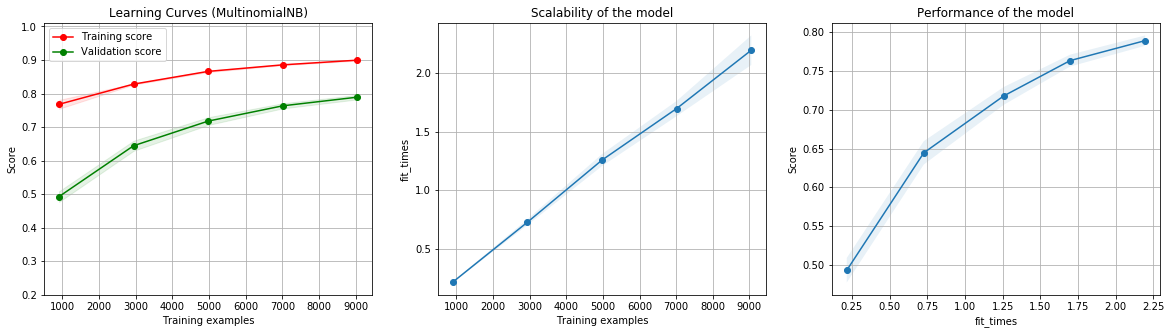

In [38]:
title = r"Learning Curves (MultinomialNB)"
estimator = text_clf
plot_learning_curve(estimator, title, news_train.data, news_train.target, ylim=(0.2, 1.01),
                    cv=None, n_jobs=2)

plt.show()

Для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации довольно сильно отличаются и при увеличении объема прямые хоть и сходятся, но очень медленно, поэтому можно говорить о **_переобучении_**

_**многослойный перцептрон (MLP)**_




очень ресурснозатратная модель для обучения

In [39]:
from sklearn.neural_network import MLPClassifier

In [46]:
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MLPClassifier(random_state=1, solver='lbfgs')),])

#при полном объеме данных время обучения очень велико, так что я обрезала объем обучающей выборки
text_clf = text_clf.fit(news_train.data[:1800], news_train.target[:1800])
predicted = text_clf.predict(news_test.data)

In [47]:
np.mean(predicted == news_test.target)
# при полном объема значение равно 0,81, так что на данном этапе модель недообучена

0.6986192246415295

In [48]:
print(metrics.classification_report(news_test.target, predicted,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.45      0.58      0.51       319
           comp.graphics       0.58      0.63      0.61       389
 comp.os.ms-windows.misc       0.65      0.74      0.69       394
comp.sys.ibm.pc.hardware       0.64      0.58      0.61       392
   comp.sys.mac.hardware       0.67      0.75      0.71       385
          comp.windows.x       0.87      0.54      0.66       395
            misc.forsale       0.71      0.75      0.73       390
               rec.autos       0.84      0.73      0.78       396
         rec.motorcycles       0.86      0.88      0.87       398
      rec.sport.baseball       0.91      0.63      0.74       397
        rec.sport.hockey       0.89      0.87      0.88       399
               sci.crypt       0.80      0.79      0.80       396
         sci.electronics       0.57      0.59      0.58       393
                 sci.med       0.86      0.55      0.67       396
         

    Несмотря на то, что было достигнуто максимльное количество итераций и возможно при установлении большего количества модель была бы оптимизирована и могла бы показать лучший результат ( при этом это заняло бы еще больше времени), даже в данном случае она показала не такой уж плохой результат, НО очень долго

### Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


Худшей моделью является KNeighborsClassifier

А лучшей - метод опорных векторов с линейным ядром (у нее самая высокая точность предсказания)

Оставшиеся модели так же обладают хорошей точностью предскзаания, но например, посоедная модель (метод MLP) очень долго обучается

### Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.


**MultinomialNB:** 2.69 s ± 87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**LogisticRegression:** 8.53 s ± 530 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**Linear SVC:** 3.36 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**KNeighborsClassifier:** 2.69 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

**MLPClassifier:** очень долго, у меня так и не посчиталось

Метод опорных векторов показал не только лучших результат среди других моделей по метрикам, но и по скорости обучени